In [3]:
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
!pip install topojson
!pip install openpyxl



In [4]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#### On importe le fichier répertoriant les installations industrielles rejetant des polluants

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_industries_polluantes = "https://files.georisques.fr/irep/2023.zip"
response_industries_polluantes = requests.get(url_industries_polluantes)

# Enregistrement du fichier localement
with open("Industries_polluantes.xlsx", "wb") as f:
    f.write(response_industries_polluantes.content)



In [6]:

import pandas as pd
import zipfile

with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/etablissements.csv") as f:
        industries_polluantes = pd.read_csv(f, sep=None, engine='python')

industries_polluantes.head()




,identifiant,nom_etablissement,numero_siret,adresse,code_postal,code_insee,commune,code_departement,departement,code_region,region,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr
0,6101975,COFIBEX,43425026200012,AVENUE DE LA LIBERATION ZONE INDUSTRIELLE,1500,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.33551,45.96163,4326.0,6420Z,Activités des sociétés holding,NaN,NaN
1,9000321,AIA Ambrieu en Bugey,15000028900135,avenue du colonel CHAMBONNET Base arienne 278,1508,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34592,45.97117,4326.0,8422Z,Défense,NaN,NaN
2,6100021,THIERRY DANNENMULLER TRANSPORTS LOCATIONS TRAV...,35234119200065,LE PELOUX CARRIERE D'AMBRONAY LE PELOUX,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34282,46.02817,4326.0,0811Z,Extraction de pierres ornementales et de const...,NaN,NaN
3,3202489,SOCIETE BRESSANE DE STOCKAGE ET DE CHARGEMENT,34408383700015,GARE,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.35873,46.00535,4326.0,5224B,Manutention non portuaire,NaN,NaN
4,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...


In [7]:
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')

rejets.head()

,identifiant,nom_etablissement,code_postal,code_insee,commune,code_departement,departement,code_region,region,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,3012489,CARRIERES & MATERIAUX NORD-EST,51150,51303,JALONS,51,MARNE,44,GRAND-EST,2023,NaN,167850.0
1,3012512,ETABLISSEMENTS BLANDIN SA,51300,51433,PLICHANCOURT,51,MARNE,44,GRAND-EST,2023,NaN,59277.0
2,3012705,KNAUF INSULATION LANNEMEZAN,57970,57343,ILLANGE,57,MOSELLE,44,GRAND-EST,2023,0.0,0.0
3,3013146,METABOLIC EXPLORER,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,55597.0,NaN
4,3014130,AFYREN NEOXY,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,7647.0,NaN


In [8]:
# on merge les deux tables
etablissements_rejets = pd.merge(industries_polluantes, rejets, on="identifiant", how="inner")
etablissements_rejets.head()

,identifiant,nom_etablissement_x,numero_siret,adresse,code_postal_x,code_insee_x,commune_x,code_departement_x,departement_x,code_region_x,...,code_postal_y,code_insee_y,commune_y,code_departement_y,departement_y,code_region_y,region_y,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,...,1350,01010,ANGLEFORT,01,AIN,84,AUVERGNE-RHONE-ALPES,2023,NaN,2253116.0
1,6101989,KEM ONE,53869504000039,258 ROUTE DE SAINT MAURICE DE GOURDANS SITE IN...,1360,01027,BALAN,01,AIN,84.0,...,1360,01027,BALAN,01,AIN,84,AUVERGNE-RHONE-ALPES,2023,NaN,685463.0
2,6112329,SK FUNCTIONAL POLYMER,87995793400059,258 ROUTE DE ST MAURICE DE GOURDANS,1360,01027,BALAN,01,AIN,84.0,...,1360,01027,BALAN,01,AIN,84,AUVERGNE-RHONE-ALPES,2023,NaN,94045.0
3,6108136,ELIAN,76020009700060,570 RUE DE L'ANGE ZI SUD PLASTICS VALLEE BP5,1100,01031,BELLIGNAT,01,AIN,84.0,...,1100,01031,BELLIGNAT,01,AIN,84,AUVERGNE-RHONE-ALPES,2023,1866.0,NaN
4,6102002,SYND INTERCOMMUNAL DE VALORISATION,25740162000030,5 CHEMIN DE TAPEY ZI D ARLOD,1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84.0,...,1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84,AUVERGNE-RHONE-ALPES,2023,NaN,25903484.0


In [9]:
#### Et on importe le fichier avec les shapefiles des communes
import requests
# Téléchargement du fichier avec les shapefiles des communes, directement depuis Datagouv
url_communes = "https://www.data.gouv.fr/api/1/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
zip_communes = "shapefiles.zip"

# Enregistrement du fichier localement
response_communes = requests.get(url_communes)
with open(zip_communes, "wb") as f:
    f.write(response_communes.content)

# Importation avec GeoPandas
communes = gpd.read_file(f"zip://{zip_communes}!communes-20220101.shp")
communes.head()

,insee,nom,wikipedia,surf_ha,geometry
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.3851, 9..."
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.2001 42.39013, 9.20014 42.39014, 9..."
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.2512 42.37605, 9.25132 42.37603, 9..."
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.2834 42.66273, 9.28345 42.66273, 9..."


In [13]:
### Préparation du dataframe de travail

# On renomme la colonne avec le code INSEE dans le df des communes (shapefiles) pour le joindre à celui tiré de Géorisques
communes_insee = communes.rename(columns={"insee" : "code_insee_x"})
communes_insee.head()
print("Colonnes de communes :", communes_insee.columns)


# On fait la jointure
df = pd.merge(communes_insee, etablissements_rejets, on="code_insee_x", how = "inner")

# On supprime la colonne wikipedia (inutile) et nom (identique à la colonne 'Commune')
del df['wikipedia']
del df['nom']
df.head()



Colonnes de communes : Index(['code_insee_x', 'nom', 'wikipedia', 'surf_ha', 'geometry'], dtype='object')


,code_insee_x,surf_ha,geometry,identifiant,nom_etablissement_x,numero_siret,adresse,code_postal_x,commune_x,code_departement_x,...,code_postal_y,code_insee_y,commune_y,code_departement_y,departement_y,code_region_y,region_y,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,66003,2932.0,"POLYGON ((2.65016 42.43154, 2.65016 42.43161, ...",6601361,STERIMED SAS,50162674100026,ROUTE DE CERET,66110,AMELIE-LES-BAINS-PALALDA,66,...,66110,66003,AMELIE-LES-BAINS-PALALDA,66,PYRENEES-ORIENTALES,76,OCCITANIE,2023,NaN,787931.0
1,97117,8288.0,"POLYGON ((-61.44199 16.2883, -61.44195 16.2913...",22100006,ALBIOMA LE MOULE,40321556900027,LIEU-DIT GARDEL SITE GE GARDEL,97160,Le Moule,971,...,97160,97117,Le Moule,971,GUADELOUPE,1,GUADELOUPE,2023,NaN,249480.0
2,97407,1617.0,"POLYGON ((55.27722 -20.95454, 55.27725 -20.954...",7101355,EDF PRODUCTION ELECTRIQUE INSULAIRE SAS,48996768700034,Site de La Baie,97420,Le Port,974,...,97420,97407,Le Port,974,REUNION,4,REUNION,2023,NaN,149625.0
3,97407,1617.0,"POLYGON ((55.27722 -20.95454, 55.27725 -20.954...",7100701,ELECTRICITE DE FRANCE,55208131712187,Site de la Baie CS 10029,97420,Le Port,974,...,97420,97407,Le Port,974,REUNION,4,REUNION,2023,NaN,1434.0
4,97407,1617.0,"POLYGON ((55.27722 -20.95454, 55.27725 -20.954...",7100079,SOC REUNION PRODUITS PETROLIERS,31083719000019,1 RUE CHARLES DICKENS ZONE INDUSTRIELLE N0 1,97420,Le Port,974,...,97420,97407,Le Port,974,REUNION,4,REUNION,2023,NaN,17091.0


In [14]:
# Conversion du fichier au format GeoPandas
df = gpd.GeoDataFrame(df, geometry='geometry')

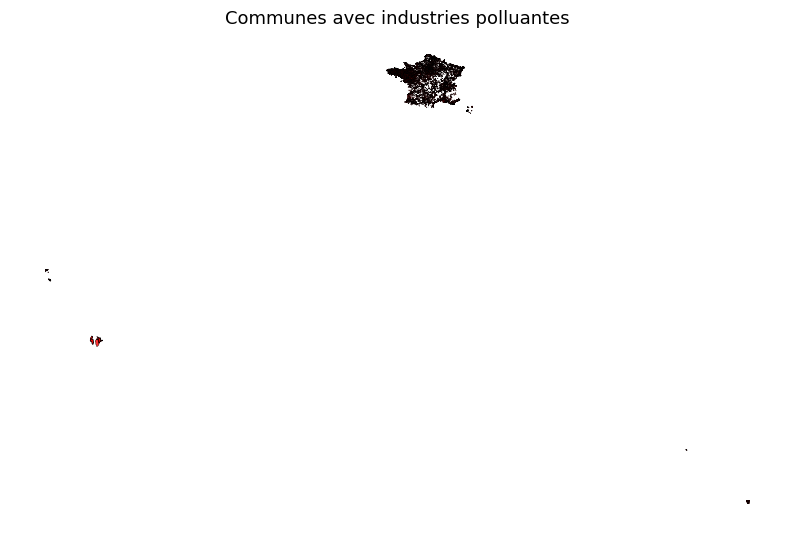

In [ ]:
# import matplotlib.pyplot as plt


# df = df.to_crs(epsg=4326)

# # On filtre les communes présentes dans la table des industries polluantes
# communes_polluantes = df[df["code_insee"].isin(industries_polluantes["code_insee"])]

# # Carte
# ax = communes_polluantes.plot(
#     color="red",        # couleur de remplissage
#     edgecolor="black",  # bordure noire
#     linewidth=0.3,
#     figsize=(10, 10),
#     alpha=0.8
# )

# plt.title("Communes avec industries polluantes", fontsize=13)
# plt.axis("off")
# plt.show()



In [16]:
# on filtre le GeoDataFrame pour ne garder que les communes d'Ile de France (code_region = 11.0)
df_idf = df[df["code_region_x"] == 11.0]

# puis on filtre celles avec industries polluantes
communes_polluantes_idf = df_idf[df_idf["code_insee_x"].isin(industries_polluantes["code_insee_x"])]

# Carte
import matplotlib.pyplot as plt

ax = communes_polluantes_idf.plot(
    color="red",
    edgecolor="black",
    linewidth=0.3,
    figsize=(10, 10),
    alpha=0.8
)

plt.title("Communes d'Ile de France' avec industries polluantes", fontsize=14)
plt.axis("off")
plt.show()


KeyError: 'code_insee_x'

In [ ]:
import pandas as pd
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')

rejets.head()
df_rejets = pd.merge(df, rejets, on="identifiant")

etablissements_rejets = pd.merge(rejets, etablissements, on="identifiant", how="left")
# Jointure sur la colonne "identifiant"
# # → chaque rejet sera enrichi des infos de l’établissement correspondant
# etablissements_rejets = rejets.merge(
#     etablissements,
#     on="identifiant",   # clé commune
#     how="left"          # on garde tous les rejets (et ajoute les infos établissement)
# )

# # Aperçu du résultat
# etablissements_rejets.head()


NameError: name 'zipfile' is not defined